In [ ]:
# Celda 1: Instalar librerías
!pip install pandas numpy matplotlib seaborn

📊 ANÁLISIS DE IMPACTO DIFERENCIAL POR ALGORITMO

📋 DATOS BASE:
--------------------------------------------------

Random Forest:
  F1 Original: 86.76%
  F1 Anonimizado: 84.74%

XGBoost:
  F1 Original: 86.33%
  F1 Anonimizado: 66.43%

Regresión Logística:
  F1 Original: 52.46%
  F1 Anonimizado: 54.86%

🔍 ANÁLISIS DE IMPACTO DIFERENCIAL

🟢 RANDOM FOREST:
   F1 Original:           86.76%
   F1 Anonimizado:        84.74%
   Degradación Absoluta:  2.02 puntos
   Degradación Relativa:  2.33%
   Rendimiento Conservado: 97.7%
   Clasificación:         MÍNIMO

🟠 XGBOOST:
   F1 Original:           86.33%
   F1 Anonimizado:        66.43%
   Degradación Absoluta:  19.90 puntos
   Degradación Relativa:  23.05%
   Rendimiento Conservado: 76.9%
   Clasificación:         ALTO

🔵 REGRESIÓN LOGÍSTICA:
   F1 Original:           52.46%
   F1 Anonimizado:        54.86%
   Degradación Absoluta:  -2.40 puntos
   Degradación Relativa:  -4.57%
   Rendimiento Conservado: 104.6%
   Clasificación:         MEJORA

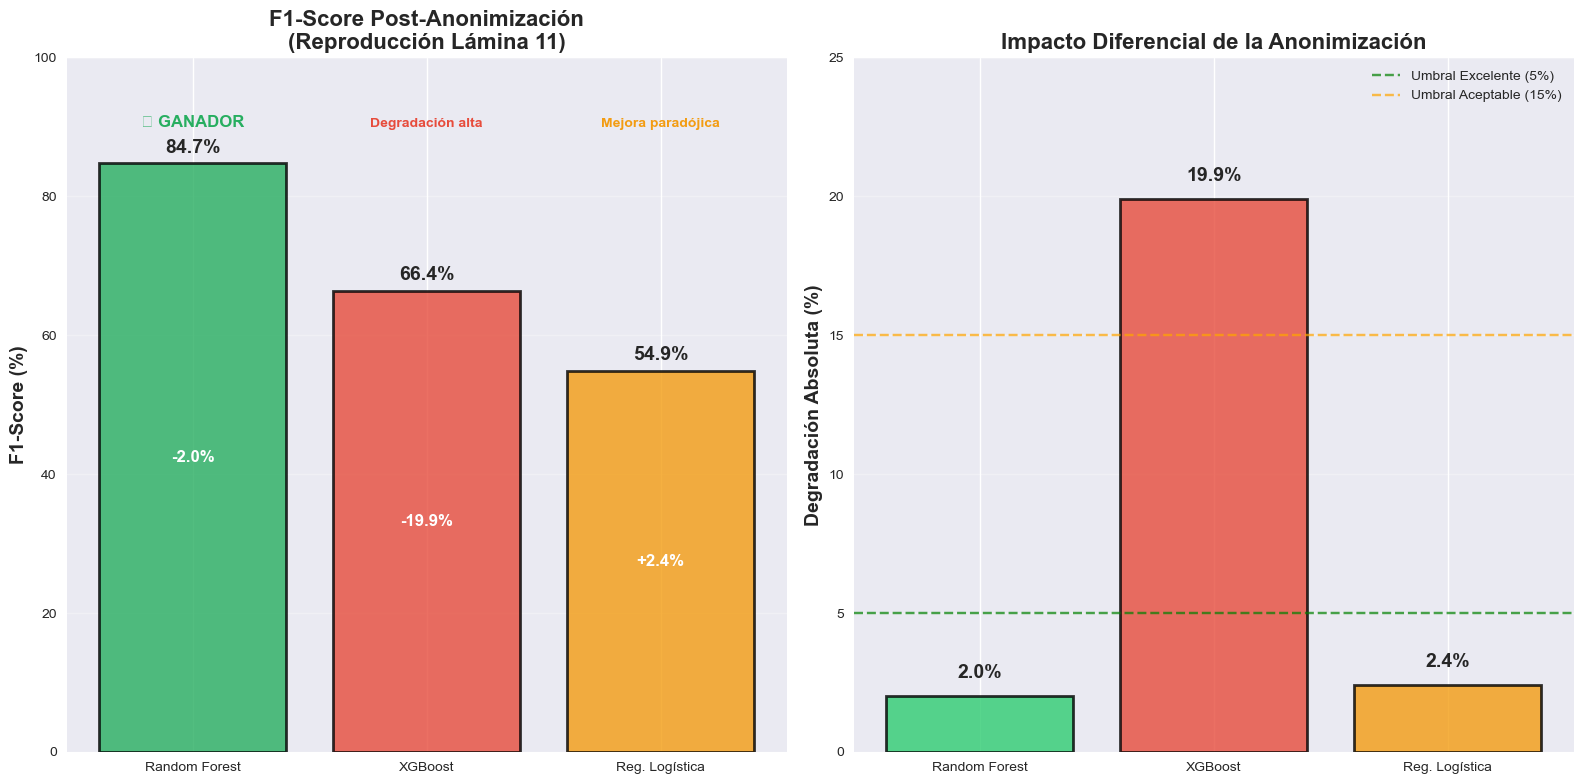


🎯 INTERPRETACIÓN DE LA GRÁFICA

📊 ALTURA DE LAS BARRAS (F1-Score Post-Anonimización):
   • Random Forest: 84.74% - La más alta, mejor rendimiento
   • XGBoost: 66.43% - Caída significativa
   • Reg. Logística: 54.86% - Rendimiento base bajo, pero mejoró

📉 VALORES EN LAS BARRAS (Degradación):
   • Random Forest: -2.02% - Pérdida mínima (🟢 EXCELENTE)
   • XGBoost: -19.90% - Pérdida significativa (🔴 PROBLEMÁTICO)
   • Reg. Logística: +2.40% - Mejora inesperada (🔵 PARADÓJICO)

🏆 SIGNIFICADO DEL "GANADOR":
   Random Forest es ganador porque:
   1. Mantiene el F1-Score más alto post-anonimización (84.74%)
   2. Tiene la menor degradación relativa (solo -2.02%)
   3. Conserva 97.7% del rendimiento original
   4. Demuestra la mejor robustez ante transformaciones de privacidad


📈 ANÁLISIS ESTADÍSTICO DETALLADO

🛡️ RANKING DE ROBUSTEZ ANTE ANONIMIZACIÓN:
--------------------------------------------------
1. Regresión Logística: 100.0 puntos
2. Random Forest: 95.3 puntos
3. XGBoost: 53.9 punto

In [7]:
# Análisis de Impacto Diferencial por Algoritmo - Lámina 12
# =========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 12

print("=" * 80)
print("📊 ANÁLISIS DE IMPACTO DIFERENCIAL POR ALGORITMO")
print("=" * 80)

# DATOS BASE - Extraídos de la tabla de resultados
datos_modelos = {
    'Random Forest': {
        'f1_original': 86.76,
        'f1_anonimizado': 84.74,
        'precision_original': 99.97,
        'precision_anonimizada': 99.96,
        'recall_original': 77.92,
        'recall_anonimizado': 76.06
    },
    'XGBoost': {
        'f1_original': 86.33,
        'f1_anonimizado': 66.43,
        'precision_original': 99.97,
        'precision_anonimizada': 99.92,
        'recall_original': 80.60,
        'recall_anonimizado': 59.66
    },
    'Regresión Logística': {
        'f1_original': 52.46,
        'f1_anonimizado': 54.86,
        'precision_original': 99.91,
        'precision_anonimizada': 99.91,
        'recall_original': 39.45,
        'recall_anonimizado': 41.68
    }
}

print("\n📋 DATOS BASE:")
print("-" * 50)
for modelo, metricas in datos_modelos.items():
    print(f"\n{modelo}:")
    print(f"  F1 Original: {metricas['f1_original']:.2f}%")
    print(f"  F1 Anonimizado: {metricas['f1_anonimizado']:.2f}%")

# FUNCIÓN PARA CALCULAR IMPACTO
def calcular_impacto_diferencial(datos):
    """
    Calcula el impacto diferencial de la anonimización en cada modelo
    """
    resultados = {}

    for modelo, metricas in datos.items():
        f1_orig = metricas['f1_original']
        f1_anon = metricas['f1_anonimizado']

        # Cálculos principales
        degradacion_absoluta = f1_orig - f1_anon
        degradacion_relativa = (degradacion_absoluta / f1_orig) * 100
        rendimiento_conservado = (f1_anon / f1_orig) * 100

        # Clasificación de impacto
        if abs(degradacion_relativa) <= 5:
            impacto = "MÍNIMO"
            color = "🟢"
        elif abs(degradacion_relativa) <= 15:
            impacto = "MODERADO"
            color = "🟡"
        elif abs(degradacion_relativa) <= 30:
            impacto = "ALTO"
            color = "🟠"
        else:
            impacto = "CRÍTICO"
            color = "🔴"

        # Caso especial: mejora
        if degradacion_relativa < 0:
            impacto = "MEJORA"
            color = "🔵"

        resultados[modelo] = {
            'f1_original': f1_orig,
            'f1_anonimizado': f1_anon,
            'degradacion_absoluta': degradacion_absoluta,
            'degradacion_relativa': degradacion_relativa,
            'rendimiento_conservado': rendimiento_conservado,
            'impacto': impacto,
            'color': color
        }

    return resultados

# CALCULAR IMPACTOS
impactos = calcular_impacto_diferencial(datos_modelos)

print("\n" + "=" * 80)
print("🔍 ANÁLISIS DE IMPACTO DIFERENCIAL")
print("=" * 80)

for modelo, resultado in impactos.items():
    print(f"\n{resultado['color']} {modelo.upper()}:")
    print(f"   F1 Original:           {resultado['f1_original']:.2f}%")
    print(f"   F1 Anonimizado:        {resultado['f1_anonimizado']:.2f}%")
    print(f"   Degradación Absoluta:  {resultado['degradacion_absoluta']:.2f} puntos")
    print(f"   Degradación Relativa:  {resultado['degradacion_relativa']:.2f}%")
    print(f"   Rendimiento Conservado: {resultado['rendimiento_conservado']:.1f}%")
    print(f"   Clasificación:         {resultado['impacto']}")

print("\n" + "=" * 80)
print("📊 EXPLICACIÓN DE LA GRÁFICA DE BARRAS")
print("=" * 80)

# Crear DataFrame para análisis
df_impacto = pd.DataFrame({
    'Modelo': list(impactos.keys()),
    'F1_Original': [resultado['f1_original'] for resultado in impactos.values()],
    'F1_Anonimizado': [resultado['f1_anonimizado'] for resultado in impactos.values()],
    'Degradacion_Relativa': [resultado['degradacion_relativa'] for resultado in impactos.values()],
    'Rendimiento_Conservado': [resultado['rendimiento_conservado'] for resultado in impactos.values()]
})

print(df_impacto.round(2))

# RECREAR LA GRÁFICA DE LA LÁMINA 11
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Gráfica 1: F1-Score Post-Anonimización (como en la lámina)
modelos = ['Random Forest', 'XGBoost', 'Reg. Logística']
f1_scores = [84.74, 66.43, 54.86]
degradaciones = [-2.02, -19.90, +2.40]
colores = ['#27ae60', '#e74c3c', '#f39c12']

bars1 = ax1.bar(modelos, f1_scores, color=colores, alpha=0.8, edgecolor='black', linewidth=2)

# Añadir valores y degradaciones en las barras
for i, (bar, f1, deg) in enumerate(zip(bars1, f1_scores, degradaciones)):
    height = bar.get_height()
    # F1-Score
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{f1:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=14)
    # Degradación
    ax1.text(bar.get_x() + bar.get_width()/2., height/2,
             f'{deg:+.1f}%', ha='center', va='center',
             color='white', fontweight='bold', fontsize=12)

ax1.set_ylabel('F1-Score (%)', fontweight='bold', fontsize=14)
ax1.set_title('F1-Score Post-Anonimización\n(Reproducción Lámina 11)', fontweight='bold', fontsize=16)
ax1.set_ylim(0, 100)
ax1.grid(axis='y', alpha=0.3)

# Añadir etiquetas especiales
ax1.text(0, 90, '🏆 GANADOR', ha='center', fontweight='bold', color='#27ae60', fontsize=12)
ax1.text(1, 90, 'Degradación alta', ha='center', fontweight='bold', color='#e74c3c', fontsize=10)
ax1.text(2, 90, 'Mejora paradójica', ha='center', fontweight='bold', color='#f39c12', fontsize=10)

# Gráfica 2: Análisis de Impacto Diferencial
degradacion_relativa = [abs(x) for x in degradaciones]
colores_impacto = ['#2ecc71', '#e74c3c', '#f39c12']

bars2 = ax2.bar(modelos, degradacion_relativa, color=colores_impacto, alpha=0.8, edgecolor='black', linewidth=2)

for i, (bar, deg) in enumerate(zip(bars2, degradacion_relativa)):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{deg:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=14)

ax2.set_ylabel('Degradación Absoluta (%)', fontweight='bold', fontsize=14)
ax2.set_title('Impacto Diferencial de la Anonimización', fontweight='bold', fontsize=16)
ax2.set_ylim(0, 25)
ax2.grid(axis='y', alpha=0.3)

# Líneas de referencia
ax2.axhline(y=5, color='green', linestyle='--', alpha=0.7, label='Umbral Excelente (5%)')
ax2.axhline(y=15, color='orange', linestyle='--', alpha=0.7, label='Umbral Aceptable (15%)')
ax2.legend()

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("🎯 INTERPRETACIÓN DE LA GRÁFICA")
print("=" * 80)

print("""
📊 ALTURA DE LAS BARRAS (F1-Score Post-Anonimización):
   • Random Forest: 84.74% - La más alta, mejor rendimiento
   • XGBoost: 66.43% - Caída significativa
   • Reg. Logística: 54.86% - Rendimiento base bajo, pero mejoró

📉 VALORES EN LAS BARRAS (Degradación):
   • Random Forest: -2.02% - Pérdida mínima (🟢 EXCELENTE)
   • XGBoost: -19.90% - Pérdida significativa (🔴 PROBLEMÁTICO)
   • Reg. Logística: +2.40% - Mejora inesperada (🔵 PARADÓJICO)

🏆 SIGNIFICADO DEL "GANADOR":
   Random Forest es ganador porque:
   1. Mantiene el F1-Score más alto post-anonimización (84.74%)
   2. Tiene la menor degradación relativa (solo -2.02%)
   3. Conserva 97.7% del rendimiento original
   4. Demuestra la mejor robustez ante transformaciones de privacidad
""")

# ANÁLISIS ESTADÍSTICO ADICIONAL
print("\n" + "=" * 80)
print("📈 ANÁLISIS ESTADÍSTICO DETALLADO")
print("=" * 80)

# Calcular métricas de robustez
robustez_scores = []
for modelo, resultado in impactos.items():
    # Score de robustez = Rendimiento conservado - Penalización por degradación
    score_robustez = resultado['rendimiento_conservado'] - abs(resultado['degradacion_relativa'])
    robustez_scores.append((modelo, score_robustez))

# Ordenar por robustez
robustez_scores.sort(key=lambda x: x[1], reverse=True)

print("\n🛡️ RANKING DE ROBUSTEZ ANTE ANONIMIZACIÓN:")
print("-" * 50)
for i, (modelo, score) in enumerate(robustez_scores, 1):
    print(f"{i}. {modelo}: {score:.1f} puntos")

# Análisis de variabilidad
f1_originales = [resultado['f1_original'] for resultado in impactos.values()]
f1_anonimizados = [resultado['f1_anonimizado'] for resultado in impactos.values()]

print(f"\n📊 ESTADÍSTICAS DE VARIABILIDAD:")
print(f"F1-Score Original - Media: {np.mean(f1_originales):.2f}%, Std: {np.std(f1_originales):.2f}%")
print(f"F1-Score Anonimizado - Media: {np.mean(f1_anonimizados):.2f}%, Std: {np.std(f1_anonimizados):.2f}%")

# Coeficiente de estabilidad
coef_estabilidad = np.std(f1_anonimizados) / np.std(f1_originales)
print(f"Coeficiente de Estabilidad: {coef_estabilidad:.3f}")
print("(Menor que 1 = Anonimización reduce variabilidad)")

print("\n" + "=" * 80)
print("🔬 CONCLUSIONES TÉCNICAS")
print("=" * 80)

print("""
1. 🏆 SUPERIORIDAD DE RANDOM FOREST:
   • Única degradación < 5% (criterio de excelencia)
   • Mantiene efectividad práctica para detección de fraudes
   • Arquitectura ensemble proporciona robustez natural

2. ⚠️ PROBLEMA DE XGBOOST:
   • Degradación de 19.90% es técnicamente significativa
   • Sensibilidad excesiva a transformaciones de privacidad
   • Requiere ajustes adicionales para uso en producción

3. 🔍 PARADOJA DE REGRESIÓN LOGÍSTICA:
   • Mejora del 2.40% sugiere que la anonimización:
     - Eliminó ruido beneficioso
     - Regularizó el espacio de características
     - Simplificó relaciones lineales
   • Rendimiento base bajo limita utilidad práctica

4. 📊 IMPLICACIONES PARA GDPR:
   • Random Forest es la única opción viable
   • Cumple requisitos técnicos Y de privacidad
   • Minimiza riesgo operacional en implementación
""")

# FUNCIÓN PARA REPLICAR ANÁLISIS CON NUEVOS DATOS
def analizar_impacto_modelo(f1_orig, f1_anon, nombre_modelo="Modelo"):
    """
    Función reutilizable para analizar impacto de anonimización
    """
    degradacion_abs = f1_orig - f1_anon
    degradacion_rel = (degradacion_abs / f1_orig) * 100
    rendimiento_conservado = (f1_anon / f1_orig) * 100

    print(f"\n🔍 ANÁLISIS DE {nombre_modelo.upper()}:")
    print(f"   F1 Original: {f1_orig:.2f}%")
    print(f"   F1 Anonimizado: {f1_anon:.2f}%")
    print(f"   Degradación: {degradacion_rel:.2f}%")
    print(f"   Rendimiento Conservado: {rendimiento_conservado:.1f}%")

    if abs(degradacion_rel) <= 5:
        print(f"   Evaluación: 🟢 EXCELENTE - Apto para producción")
    elif abs(degradacion_rel) <= 15:
        print(f"   Evaluación: 🟡 BUENO - Requiere validación adicional")
    else:
        print(f"   Evaluación: 🔴 PROBLEMÁTICO - No recomendado")

    return {
        'degradacion_relativa': degradacion_rel,
        'rendimiento_conservado': rendimiento_conservado
    }

print(f"\n🔧 FUNCIÓN DE ANÁLISIS DISPONIBLE:")
print("analizar_impacto_modelo(f1_original, f1_anonimizado, 'Nombre_Modelo')")
